In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [ ]:
from google.colab import files
files.upload()

In [ ]:


df = pd.read_csv("LCC_MLH1 - Sheet1.csv")
print(df)

     LCC no.           Name SEX genotype  Age Smoking   Type  \
0          1   Suresh Kumar   M        w   45       Y  Beedi   
1          2   Suresh Kumar   M        H   39       Y  Beedi   
2          3  Jaswant Singh   M        W   38       Y  Beedi   
3          4   Kastoori lal   M        H   42       Y  Beedi   
4          5   Jagtar Singh   M        W   69       Y  Beedi   
..       ...            ...  ..      ...  ...     ...    ...   
495      496    Ashok kumar   F        h   60       N      N   
496      497        Savitri   F        h   58       N      N   
497      498         Phoolo   F        h   57       N      N   
498      499          Gomti   F        h   46       N      N   
499      500     Sooro devi   F        h   45       N      N   

    No. of Beedi's/ciagratte daily Years smoked  Pack years  Pack Yrs 0_1  
0                           14-Jan           25       18.75             0  
1                               30           23       34.50             1  
2  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
df.shape

(500, 11)

In [ ]:
df

,LCC no.,Name,SEX,genotype,Age,Smoking,Type,No. of Beedi's/ciagratte daily,Years smoked,Pack years,Pack Yrs 0_1
0,1,Suresh Kumar,M,w,45,Y,Beedi,14-Jan,25,18.75,0
1,2,Suresh Kumar,M,H,39,Y,Beedi,30,23,34.50,1
2,3,Jaswant Singh,M,W,38,Y,Beedi,30,25,37.50,1
3,4,Kastoori lal,M,H,42,Y,Beedi,20,24,24.00,1
4,5,Jagtar Singh,M,W,69,Y,Beedi,20,45,45.00,1
...,...,...,...,...,...,...,...,...,...,...,...
495,496,Ashok kumar,F,h,60,N,N,N,N,0.00,0
496,497,Savitri,F,h,58,N,N,N,N,0.00,0
497,498,Phoolo,F,h,57,N,N,N,N,0.00,0
498,499,Gomti,F,h,46,N,N,N,N,0.00,0


In [ ]:
df.head()

,LCC no.,Name,SEX,genotype,Age,Smoking,Type,No. of Beedi's/ciagratte daily,Years smoked,Pack years,Pack Yrs 0_1
0,1,Suresh Kumar,M,w,45,Y,Beedi,14-Jan,25,18.75,0
1,2,Suresh Kumar,M,H,39,Y,Beedi,30,23,34.50,1
2,3,Jaswant Singh,M,W,38,Y,Beedi,30,25,37.50,1
3,4,Kastoori lal,M,H,42,Y,Beedi,20,24,24.00,1
4,5,Jagtar Singh,M,W,69,Y,Beedi,20,45,45.00,1


In [ ]:
df.describe()

,LCC no.,Age,Pack years,Pack Yrs 0_1
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,61.676000,13.848600,0.252000
std,144.481833,11.408915,11.271544,0.434596
min,1.000000,31.000000,0.000000,0.000000
25%,125.750000,55.000000,5.575000,0.000000
50%,250.500000,61.000000,11.250000,0.000000
75%,375.250000,70.000000,20.000000,1.000000
max,500.000000,83.000000,51.000000,1.000000


In [ ]:
df.isnull().sum()

LCC no.                           0
Name                              0
SEX                               0
genotype                          0
Age                               0
Smoking                           0
Type                              0
No. of Beedi's/ciagratte daily    0
Years smoked                      0
Pack years                        0
Pack Yrs 0_1                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding Pack years and GENDER column.

In [ ]:
#replacing M with 1 and F with 2
df.SEX[df.SEX == 'M'] = 1
df.SEX[df.SEX == 'F'] = 2
print(df)

     LCC no.           Name SEX genotype  Age Smoking   Type  \
0          1   Suresh Kumar   1        w   45       Y  Beedi   
1          2   Suresh Kumar   1        H   39       Y  Beedi   
2          3  Jaswant Singh   1        W   38       Y  Beedi   
3          4   Kastoori lal   1        H   42       Y  Beedi   
4          5   Jagtar Singh   1        W   69       Y  Beedi   
..       ...            ...  ..      ...  ...     ...    ...   
495      496    Ashok kumar   2        h   60       N      N   
496      497        Savitri   2        h   58       N      N   
497      498         Phoolo   2        h   57       N      N   
498      499          Gomti   2        h   46       N      N   
499      500     Sooro devi   2        h   45       N      N   

    No. of Beedi's/ciagratte daily Years smoked  Pack years  Pack Yrs 0_1  
0                           14-Jan           25       18.75             0  
1                               30           23       34.50             1  
2  

<ipython-input-11-a0d583c79988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SEX[df.SEX == 'M'] = 1
<ipython-input-11-a0d583c79988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SEX[df.SEX == 'F'] = 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Pack Yrs 0_1']=encoder.fit_transform(df['Pack Yrs 0_1'])
df['SEX']=encoder.fit_transform(df['SEX'])
df.head()

,LCC no.,Name,SEX,genotype,Age,Smoking,Type,No. of Beedi's/ciagratte daily,Years smoked,Pack years,Pack Yrs 0_1
0,1,Suresh Kumar,0,w,45,Y,Beedi,14-Jan,25,18.75,0
1,2,Suresh Kumar,0,H,39,Y,Beedi,30,23,34.50,1
2,3,Jaswant Singh,0,W,38,Y,Beedi,30,25,37.50,1
3,4,Kastoori lal,0,H,42,Y,Beedi,20,24,24.00,1
4,5,Jagtar Singh,0,W,69,Y,Beedi,20,45,45.00,1


### Exploratory Data analysis

In [ ]:
#separating continuous and categorical columns
con_col = ['Age']
cat_col=[]
for i in df.columns:
    if i!='Age':
        cat_col.append(i)

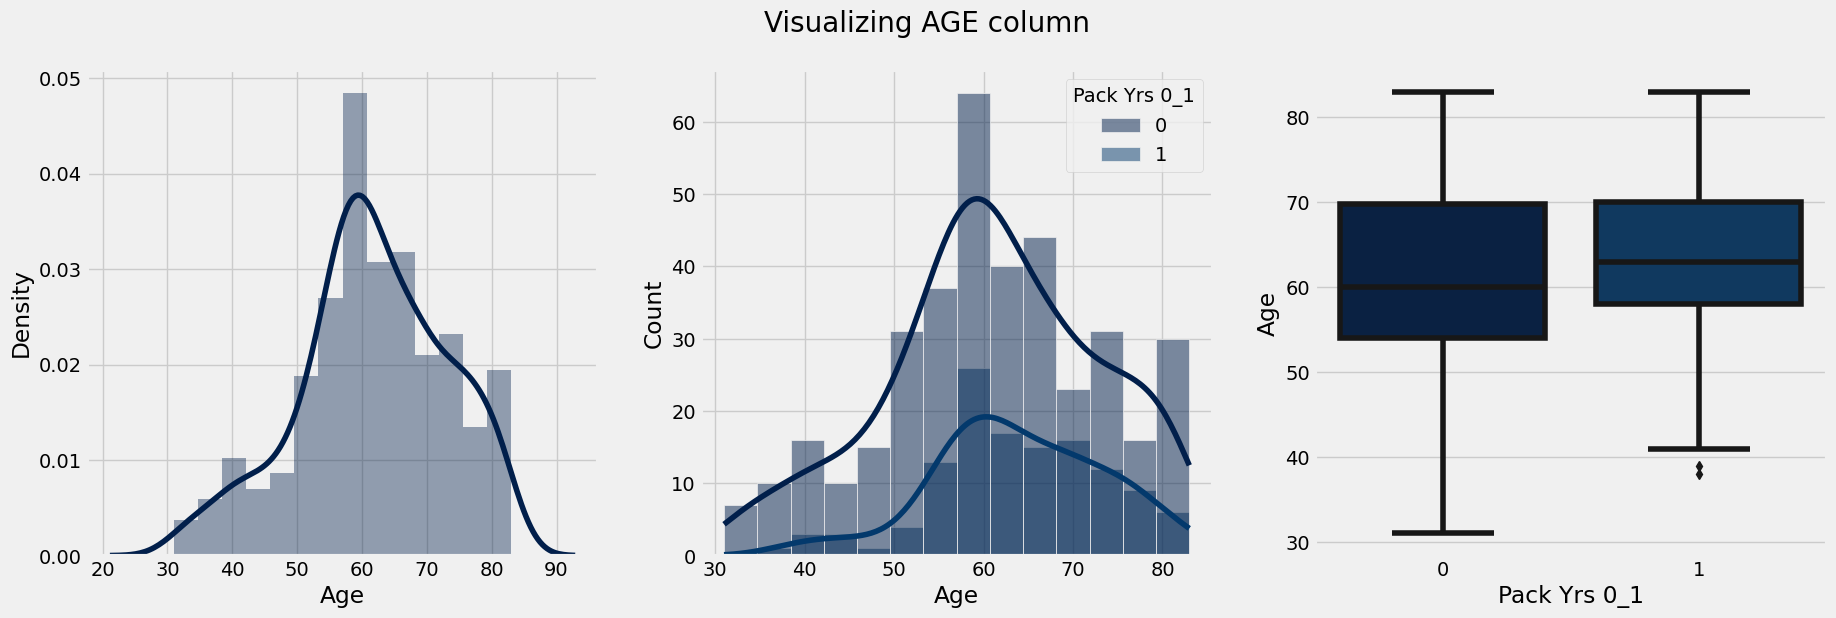

In [ ]:
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['Age'],ax=ax[0])
sns.histplot(data =df,x='Age',ax=ax[1],hue='Pack Yrs 0_1',kde=True)
sns.boxplot(x=df['Pack Yrs 0_1'],y=df['Age'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

#### Observations:
#### 1) Some outliers are present in the dataset. Inferred from box-plot.
#### 2) Most common age ranges from 50-80. This was also inferred from describe method.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

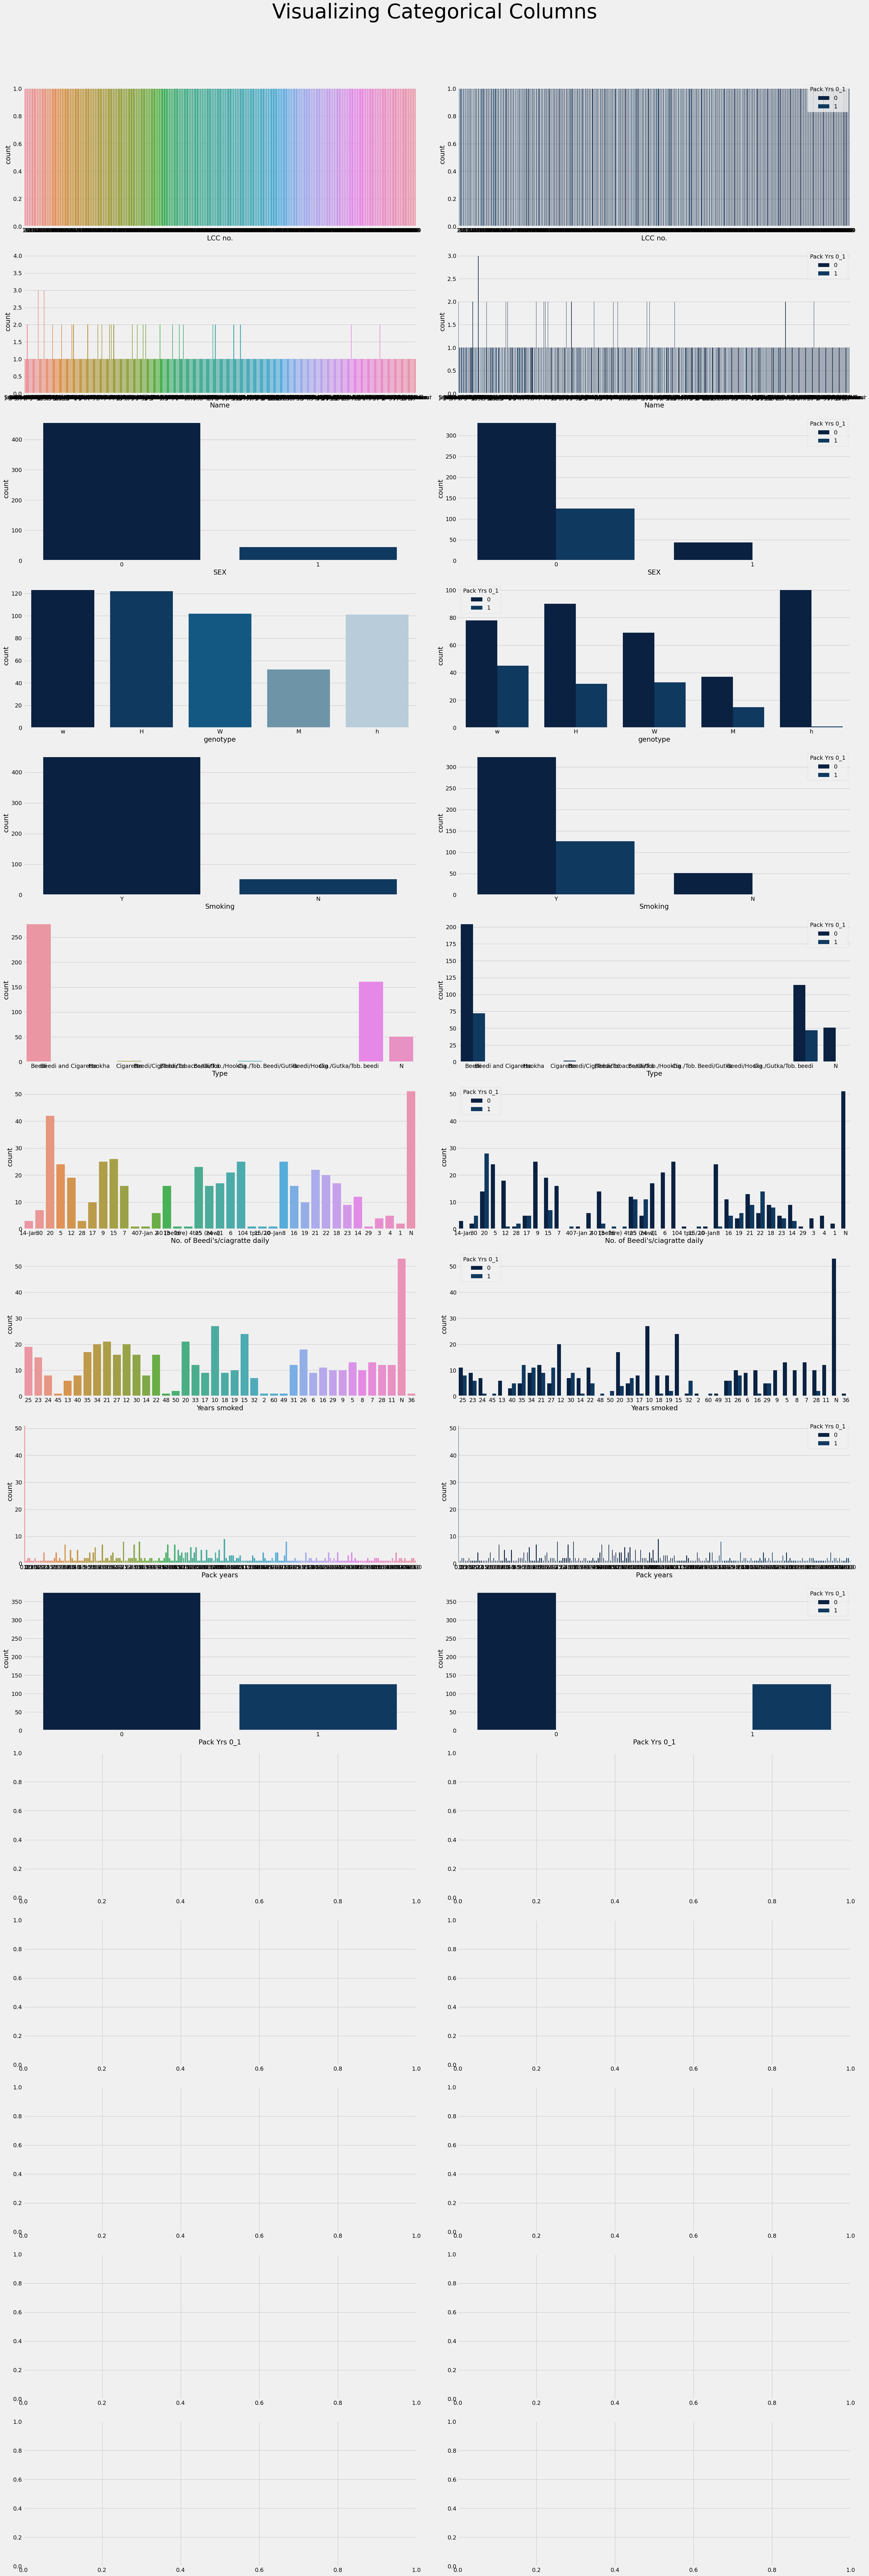

In [ ]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='Pack Yrs 0_1')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

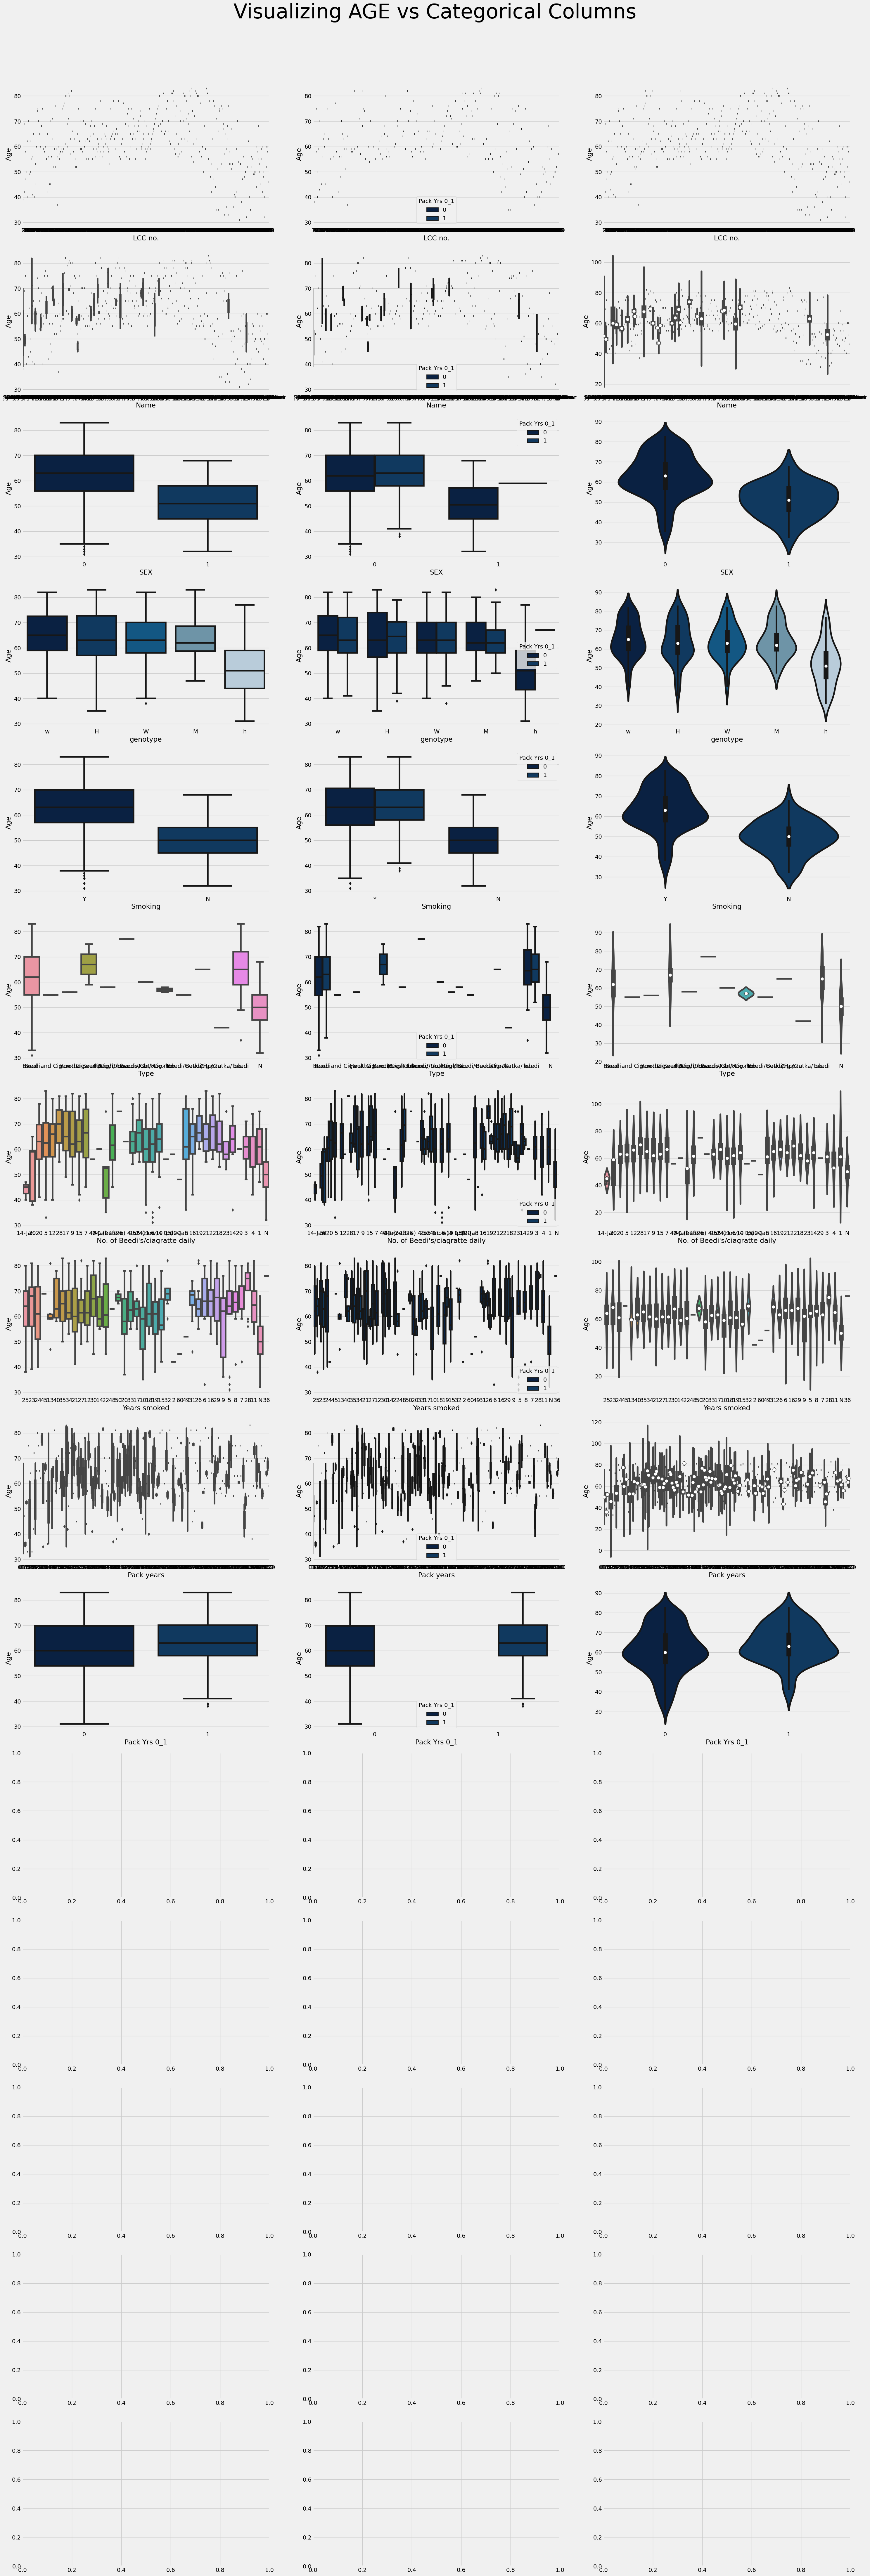

In [ ]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['Age'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['Age'],ax=ax[index,1],hue=df['Pack Yrs 0_1'])
    sns.violinplot(x=df[i],y=df['Age'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

<Axes: >

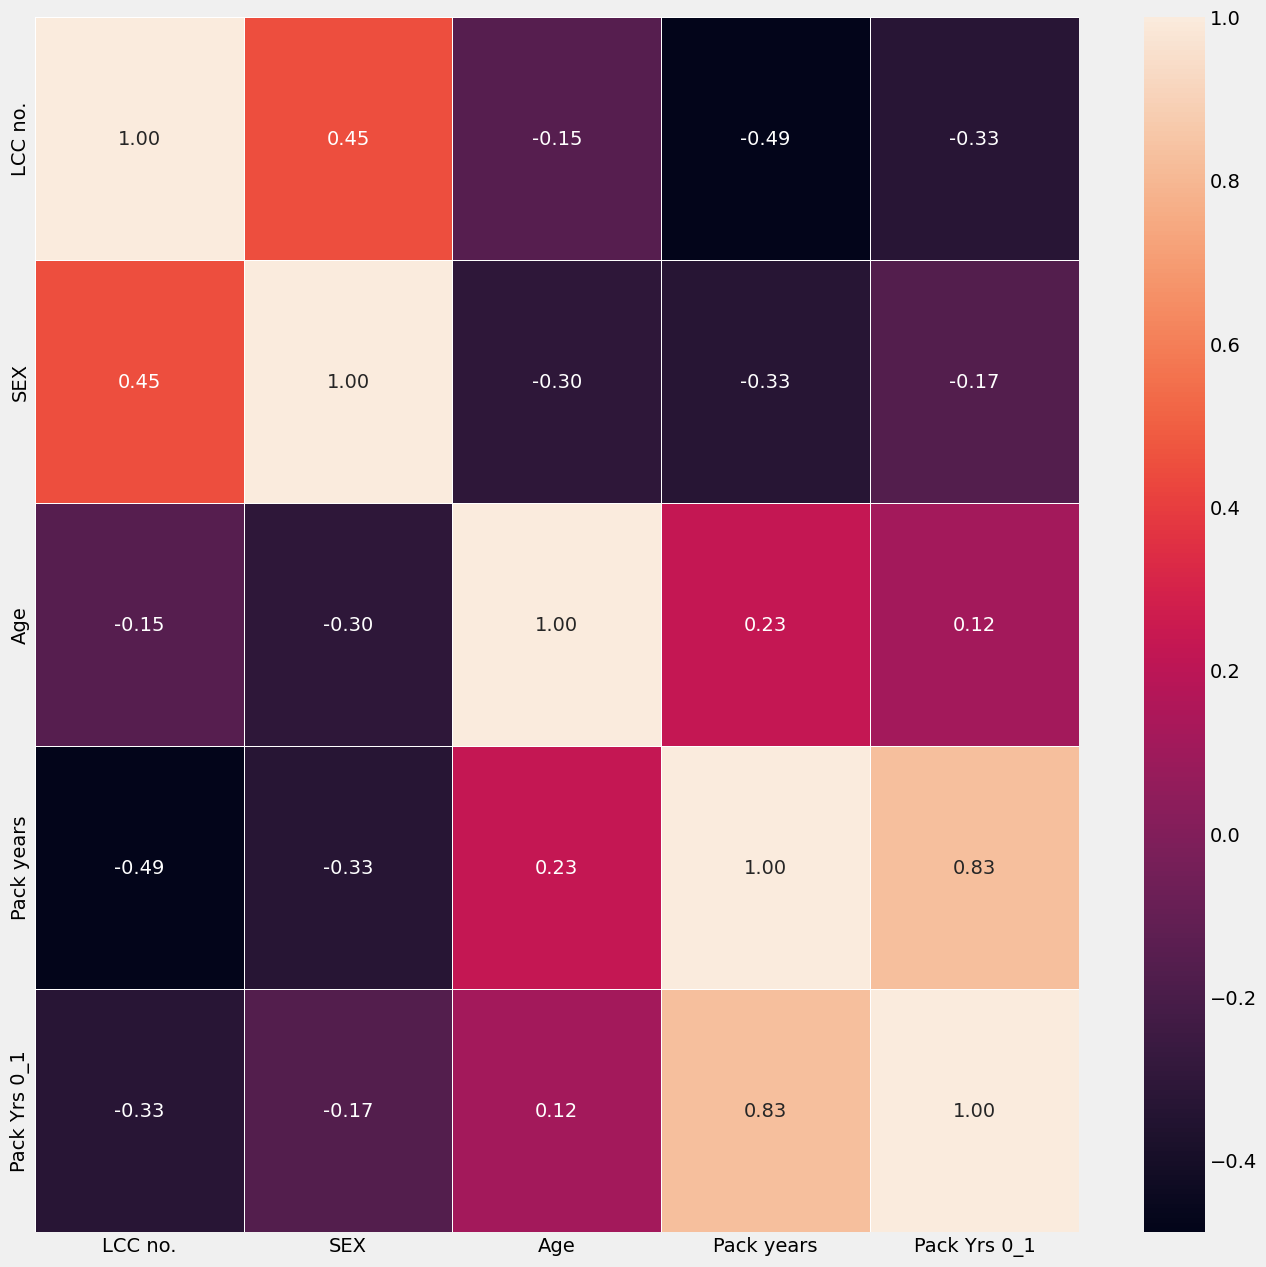

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [ ]:
X=df.drop(['Pack Yrs 0_1'],axis=1)
y=df['Pack Yrs 0_1']

In [ ]:
import pandas as pd

# Assuming X is a DataFrame containing your data
for i in X.columns[2:]:
    temp = []
    for j in X[i]:
        try:
            temp.append(int(j) - 1)
        except ValueError:
            temp.append(j)  # Keep non-numeric values as they are
    X[i] = temp

X.head()



,LCC no.,Name,SEX,genotype,Age,Smoking,Type,No. of Beedi's/ciagratte daily,Years smoked,Pack years
0,1,Suresh Kumar,-1,w,44,Y,Beedi,14-Jan,24,17
1,2,Suresh Kumar,-1,H,38,Y,Beedi,29,22,33
2,3,Jaswant Singh,-1,W,37,Y,Beedi,29,24,36
3,4,Kastoori lal,-1,H,41,Y,Beedi,19,23,23
4,5,Jagtar Singh,-1,W,68,Y,Beedi,19,44,44


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [ ]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (561, 10)
Test shape: (187, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['Age']=scaler.fit_transform(X_train[['Age']])
X_test['Age']=scaler.transform(X_test[['Age']])
X_train.head()

,LCC no.,Name,SEX,genotype,Age,Smoking,Type,No. of Beedi's/ciagratte daily,Years smoked,Pack years
682,103,Narinder,-1,H,1.161554,Y,beedi,21,28,30
428,429,alok,-1,h,-2.098002,Y,Beedi,4,8,1
294,295,Simranjit Singh,-1,w,-0.049138,Y,beedi,17,32,28
225,226,Kishor,-1,H,0.230252,Y,Beedi,14,9,6
177,178,Kherudeen,-1,H,1.161554,Y,Beedi,22,9,10


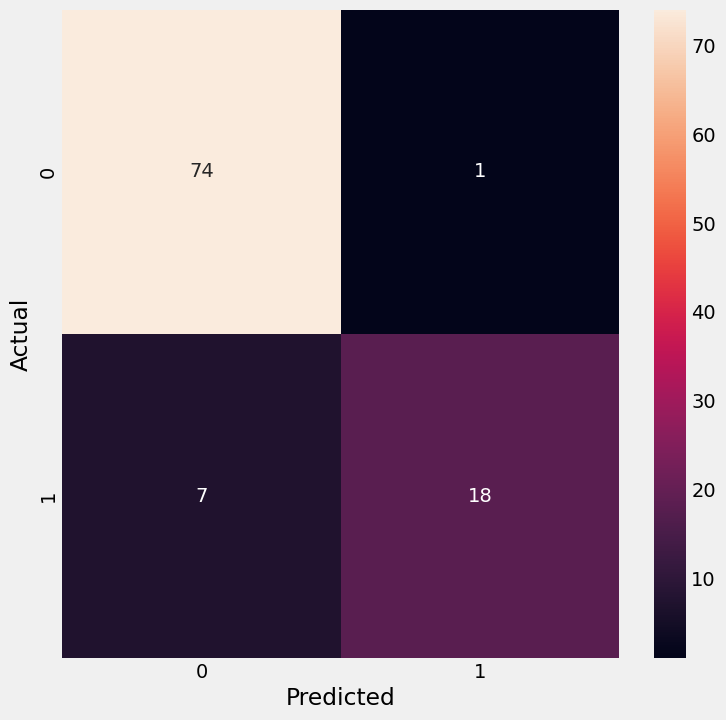

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

confusion_knn = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, knn.predict(X_test)))


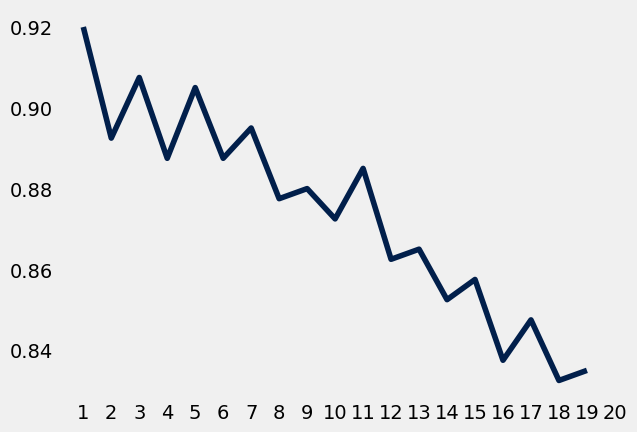

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

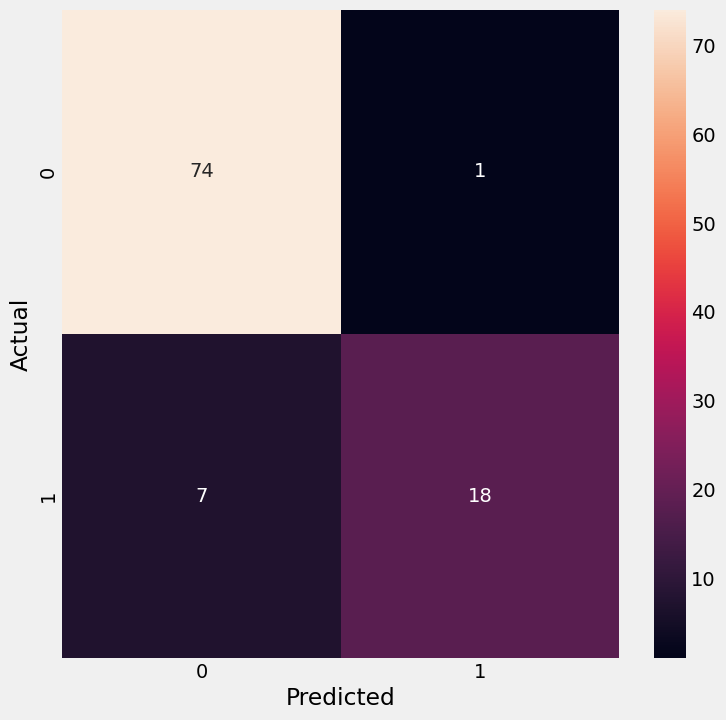

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y contain your feature and target variables respectively

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Generate the confusion matrix
confusion_knn = confusion_matrix(y_test, knn.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate the classification report
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.90      0.76      0.83        25

    accuracy                           0.92       100
   macro avg       0.91      0.87      0.89       100
weighted avg       0.92      0.92      0.92       100


Best Parameters of SVC model is : {'gamma': 0.01, 'C': 10}



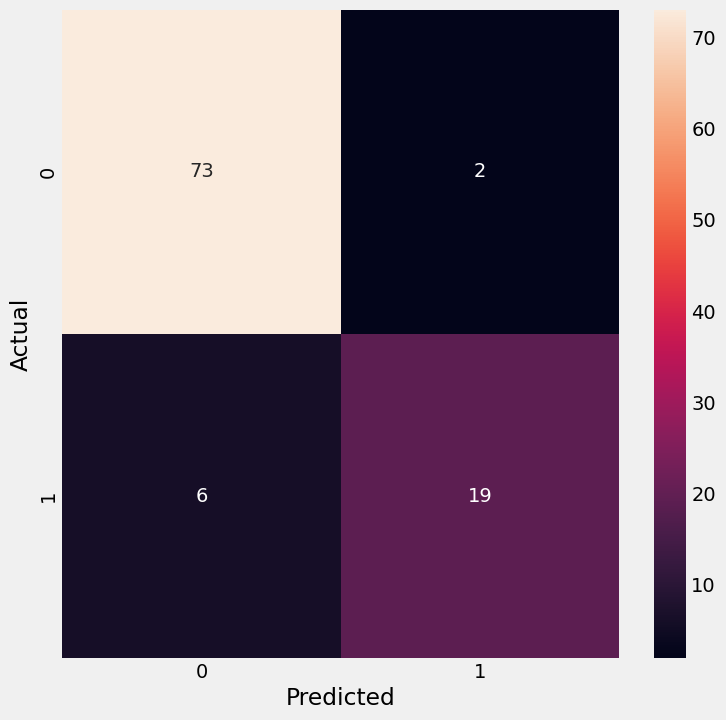

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



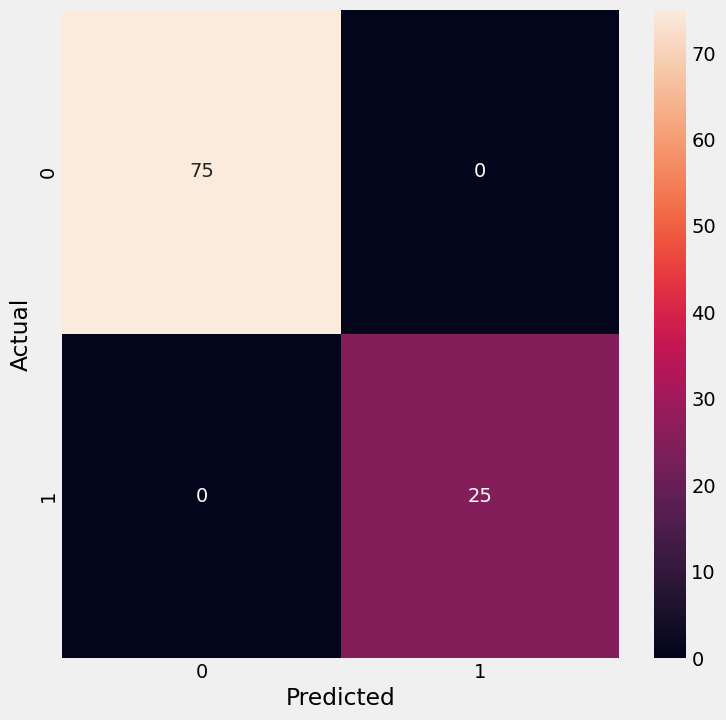

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Best Parameter: {'n_estimators': 50}



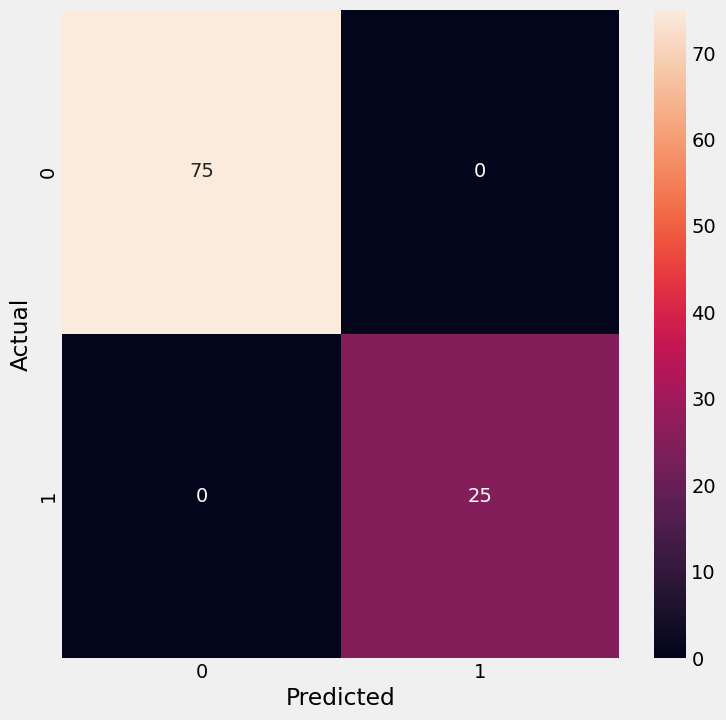

In [ ]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Best Parameter: {'n_estimators': 200, 'learning_rate': 0.05}



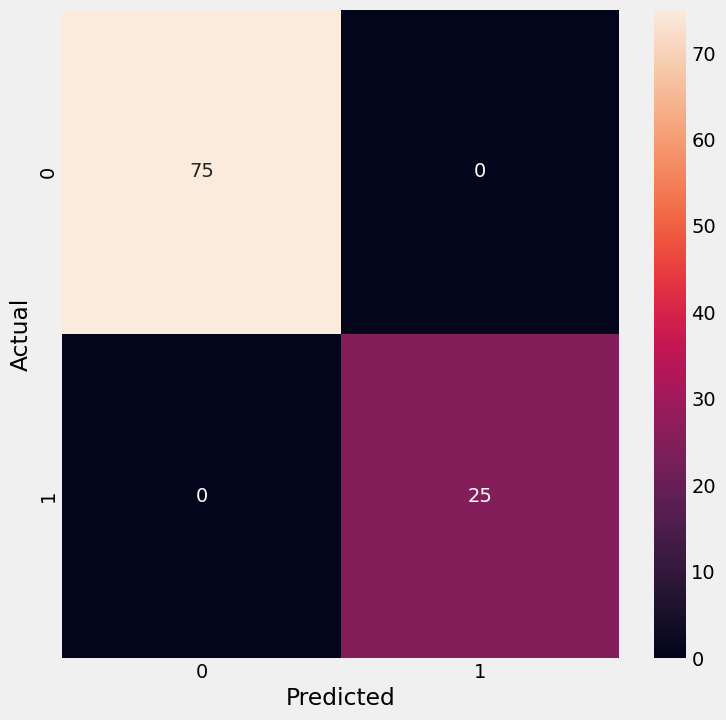

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



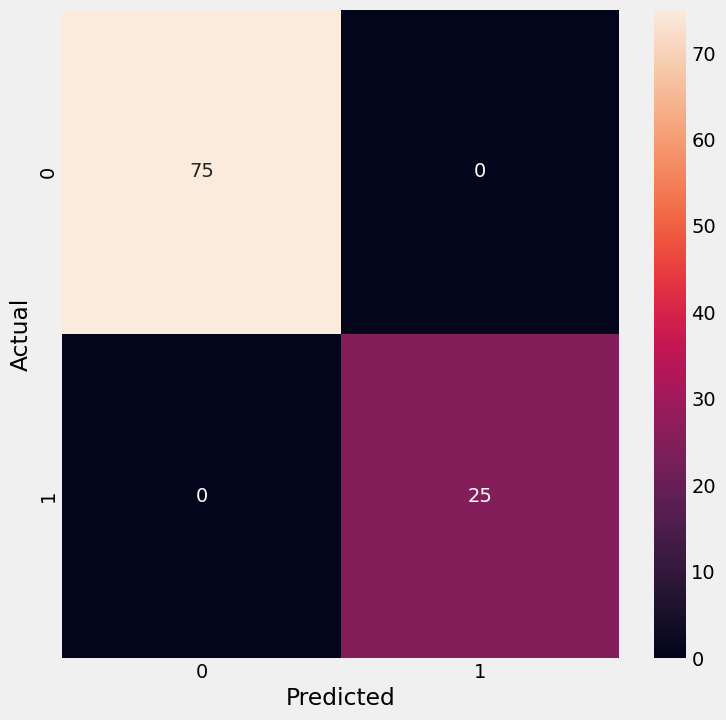

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

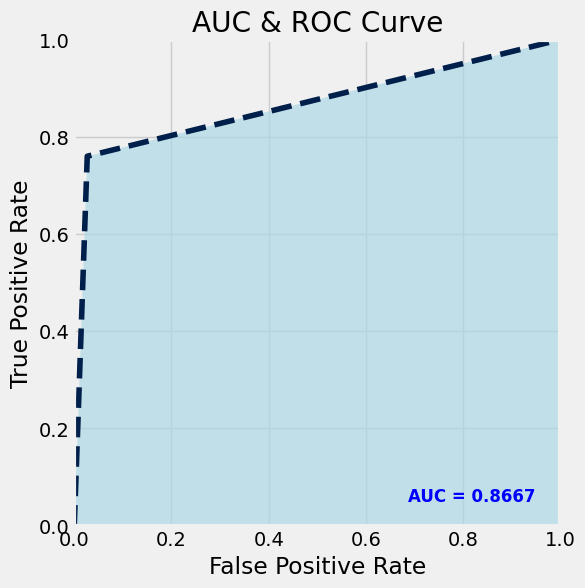

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()